In [3]:
import torch
from torch import nn
torch.__version__

'1.13.1+cu116'

Setting device to cuda if available

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Getting data
in our case, we have already downloaded the data in .zip format
so in the snippet below we are going to extact it 

In [13]:
import zipfile
from pathlib import Path

# Setup path to the data folder
data_path = Path("data/")
image_path = data_path / "cats_dogs"

# making the image folder and unzipping the dataset

if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    image_path.mkdir(parents=True, exist_ok= True)
    with zipfile.ZipFile(data_path / "kagglecatsanddogs_3367a.zip" , "r") as zip_ref :
        print("unzipping the file..")
        zip_ref.extractall(image_path)

unzipping the file..


# Exploring the data 
now we are going to devide our images into to folders called, train and test
in each contating to folders called cats and dogs

In [7]:
import os
def walk_through_dir(dir_path):
    """
    Walks through dir_path returning its contents
    Args : dir_path (str or pathlib.Path): target directory

    Returns A print of: 
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
    """
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [15]:
walk_through_dir(image_path)

There are 1 directories and 2 images in 'data\cats_dogs'.
There are 2 directories and 0 images in 'data\cats_dogs\PetImages'.
There are 0 directories and 12501 images in 'data\cats_dogs\PetImages\Cat'.
There are 0 directories and 12501 images in 'data\cats_dogs\PetImages\Dog'.


# Creating train and test directories 


In [6]:
def creat_folders(dir_path,folder_name):
    """
    Makes a new directory using the driectory path 
    Args : 
        dir_path (str or pathlib.Path): target directory
        folder_name (str): name of the desired folder
    """
    new_folder = os.path.join(dir_path, folder_name)
    os.makedirs(new_folder)


In [21]:
# makeing train and test directories including cats and dogs folders in each

train_dir = image_path / "train"
test_dir = image_path / "test"

if train_dir.is_dir():
    print(f"{train_dir} directory exists.")
else:
    data_dir = image_path
    creat_folders(data_dir,"train")
    
if test_dir.is_dir():
    print(f"{test_dir} directory exists.")
else:
    data_dir = image_path
    creat_folders(data_dir,"test")

categories = ["cats" , "dogs"]
for item in categories:
    creat_folders(train_dir , item)
    creat_folders(test_dir , item)

In [5]:
import os
import random
import shutil

def move_files(source_dir, destination_dir, num_files , seed = 42):
    """
    moves some random files from one directory to another, if num_files is set to -1,
        moves all of the files from the source 
    Args : 
         source_dir : the path to the source directory
         destination_dir : the path to the destination directory
         num_files : the number of random files you want to move
         seed : the seed number
    """
    if num_files == -1 :
        files = os.listdir(source_dir)
        selected_files = files
    else: 
        random.seed(seed)
        # Get a list of all files in the source directory
        files = os.listdir(source_dir)
        # Randomly select 'num_files' files from the list
        selected_files = random.sample(files, num_files)
    
    # Move the selected files to the destination directory
    for file_name in selected_files:
        source_path = os.path.join(source_dir, file_name)
        destination_path = os.path.join(destination_dir, file_name)
        shutil.move(source_path, destination_path)

In [29]:
# using walk_through_dir to see where the images are 
walk_through_dir(image_path)

There are 3 directories and 2 images in 'data\cats_dogs'.
There are 2 directories and 0 images in 'data\cats_dogs\PetImages'.
There are 0 directories and 12501 images in 'data\cats_dogs\PetImages\Cat'.
There are 0 directories and 12501 images in 'data\cats_dogs\PetImages\Dog'.
There are 2 directories and 0 images in 'data\cats_dogs\test'.
There are 0 directories and 0 images in 'data\cats_dogs\test\cats'.
There are 0 directories and 0 images in 'data\cats_dogs\test\dogs'.
There are 2 directories and 0 images in 'data\cats_dogs\train'.
There are 0 directories and 0 images in 'data\cats_dogs\train\cats'.
There are 0 directories and 0 images in 'data\cats_dogs\train\dogs'.


In [41]:
# moveing images from source directory in to the train and test driectories
## moving some randome images from source to test directory for both categories 

cat_images_source_directory =  image_path / "Petimages" / "Cat"
dog_images_source_directory =  image_path / "Petimages" / "Dog"
dog_test_destination_directory = test_dir / "dogs"
cat_test_destination_directory = test_dir / "cats"
cat_train_destination_directory = train_dir / "cats"
dog_train_destination_directory = train_dir / "dogs"

train_test_split = 0.2
num_test_images = int(12501 * train_test_split)
# cat images 
move_files(cat_images_source_directory, cat_test_destination_directory, num_files= num_test_images, seed= 42 )
# dog images 
move_files(dog_images_source_directory, dog_test_destination_directory, num_files= num_test_images, seed= 42 )

# now that we have the test images , we move the rest of the source images to the train folder

# cat images 
move_files(cat_images_source_directory, cat_train_destination_directory, num_files= -1)
# dog images 
move_files(dog_images_source_directory, dog_train_destination_directory, num_files= -1)

## Visualizing an image to get some information
    1- Get all of the image paths using pathlib.Path.glob() to find all of the files ending in .jpg.
    2- Pick a random image path using Python's random.choice().
    3- Get the image class name using pathlib.Path.parent.stem.
    4- And since we're working with images, we'll open the random image path using PIL.Image.open() (PIL stands for Python Image Library).
    5- We'll then show the image and print some metadata.


Random image path: data\cats_dogs\train\dogs\5421.jpg
Image class: dogs
Image height: 324
Image width: 460


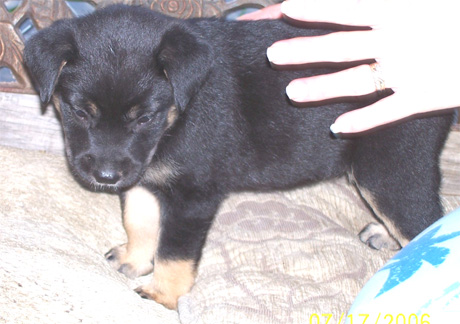

In [9]:
import random
from PIL import Image

# setting seed
random.seed(42)

# get all the image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# get random image path
random_image_path = random.choice(image_path_list)

# get hte image class name
image_class = random_image_path.parent.stem

# open image
img = Image.open(random_image_path)

# print some metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

# Transforming data
transforming images into tensors ...